<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [ ]:
# !pip install pandas
# !pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

#### Step 1: Load the dataset


In [ ]:
# Load the data
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
data = pd.read_csv(file_path)

In [ ]:
# Make a copy of original data
df = data.copy()

In [ ]:
# DATA WRANGLING

import numpy as np

# Add Age_Median column
age_map = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Median'] = df['Age'].map(age_map)

# Add MainBranch_Type column
mainbranch_map = {
    'I am a developer by profession': 'Professional',
    'I am learning to code': 'Learner',
    'I code primarily as a hobby': 'Hobbyist',
    'I am not primarily a developer, but I write code sometimes as part of my work/studies': 'Occasional',
    'I used to be a developer by profession, but no longer am': 'Former Professional'
}
df['MainBranch_Type'] = df['MainBranch'].map(mainbranch_map)

# Add TimeSearching_Median column
timesearching_map = {
    'Less than 15 minutes a day': 7,
    '15-30 minutes a day': 22,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 121
}
df['TimeSearching_Median'] = df['TimeSearching'].map(timesearching_map)
df['TimeSearching_Median'] = pd.to_numeric(df['TimeSearching_Median'], errors='coerce')

# Convert YearsCodePro to number
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year' : 17,
    'More than 50 years' : 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Add YearsCodePro_Level column
def convert_experience(val):
    if val == 'None' or pd.isna(val):
        return np.nan
    if val <= 2:
        return 'Beginner (0-2)'
    elif val <= 5:
        return 'Junior (3-5)'
    elif val <= 10:
        return 'Mid (6-10)'
    elif val <= 20:
        return 'Senior (11-20)'
    else:
        return 'Veteran (21+)'
df['YearsCodePro_Level'] = df['YearsCodePro'].apply(convert_experience)

# Add JobSatPoints_6_Level column
def categorize_jobsat(val):
    if pd.isna(val):
        return np.nan
    elif val <= 14:
        return 'Very Low (0–14)'
    elif val <= 29:
        return 'Low (15–29)'
    elif val <= 44:
        return 'Fair (30–44)'
    elif val <= 59:
        return 'Moderate (45–59)'
    elif val <= 74:
        return 'High (60–74)'
    elif val <= 89:
        return 'Very High (75–89)'
    else:
        return 'Extremely High (90+)'
df['JobSatPoints_6_Level'] = df['JobSatPoints_6'].apply(categorize_jobsat)

# Standardize Country column
country_mapping = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Iran, Islamic Republic of...': 'Iran',
    'Republic of North Macedonia': 'North Macedonia',
    'United Republic of Tanzania': 'Tanzania',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    'Bosnia and Herzegovina': 'Bosnia',
    'Hong Kong (S.A.R.)': 'Hong Kong',
    "Lao People's Democratic Republic": 'Laos',
    'Democratic Republic of the Congo': 'DR Congo',
    "Côte d'Ivoire": "Ivory Coast",
    "Democratic People's Republic of Korea": 'North Korea',
    'Congo, Republic of the...': 'Republic of Congo',
    'Guinea-Bissau': 'Guinea-Bissau',
    'Central African Republic': 'CAR',
    'Libyan Arab Jamahiriya': 'Libya',
    'Saint Kitts and Nevis': 'St. Kitts & Nevis',
    'Micronesia, Federated States of...': 'Micronesia'
}
df['Country'] = df['Country'].replace(country_mapping)

# Standardize EdLevel column
edlevel_mapping = {
    'Primary/elementary school': 'Primary School',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'High School',
    'Some college/university study without earning a degree': 'Some College',
    'Associate degree (A.A., A.S., etc.)': 'Associate Degree',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s Degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s Degree',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Doctorate or Professional Degree',
    'Something else': 'Other'
}
df['EdLevel'] = df['EdLevel'].replace(edlevel_mapping)


### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




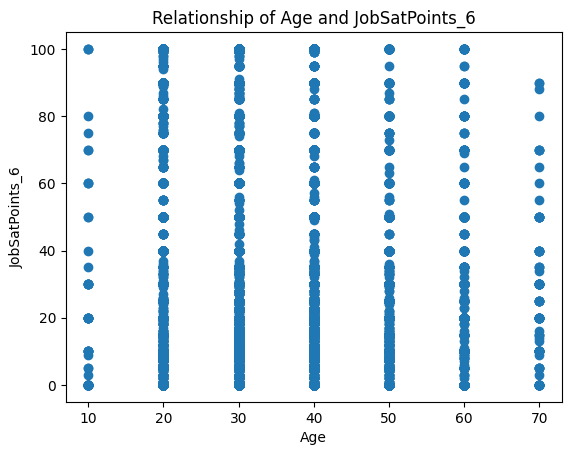

In [37]:
plt.scatter(df['Age_Median'], df['JobSatPoints_6'])
plt.title('Relationship of Age and JobSatPoints_6')
plt.xlabel('Age')
plt.ylabel('JobSatPoints_6')
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


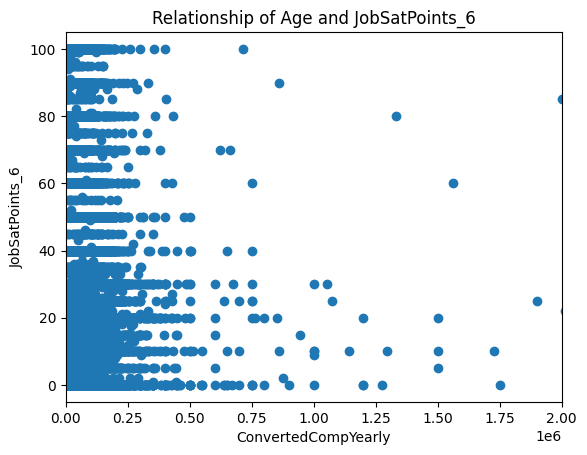

In [46]:
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'])
plt.title('Relationship of Age and JobSatPoints_6')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('JobSatPoints_6')
plt.xlim(0, 2000000)
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


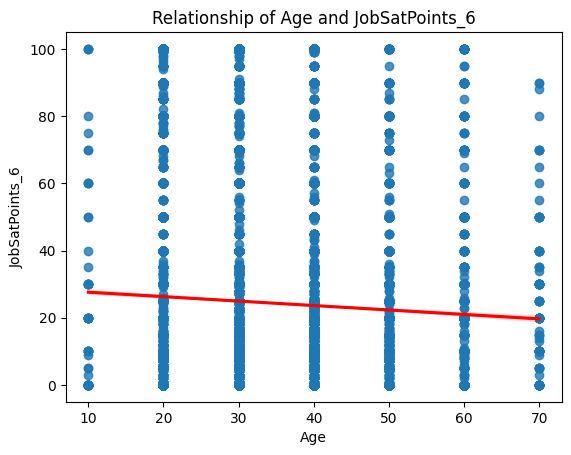

In [50]:
sn.regplot(data=df, x='Age_Median', y='JobSatPoints_6', line_kws={'color': 'red'})
plt.title('Relationship of Age and JobSatPoints_6')
plt.xlabel('Age')
plt.ylabel('JobSatPoints_6')
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


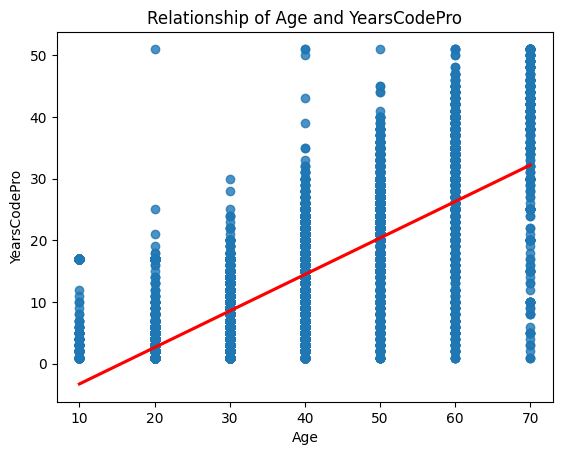

In [51]:
sn.regplot(data=df, x='Age_Median', y='YearsCodePro', line_kws={'color': 'red'})
plt.title('Relationship of Age and YearsCodePro')
plt.xlabel('Age')
plt.ylabel('YearsCodePro')
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


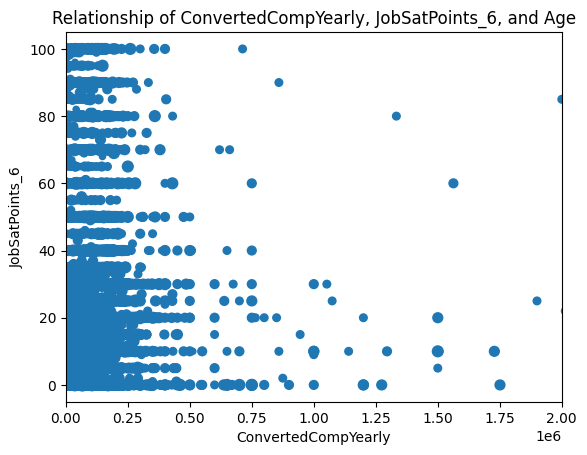

In [87]:
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], s=df['Age_Median'])
plt.title('Relationship of ConvertedCompYearly, JobSatPoints_6, and Age')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('JobSatPoints_6')
plt.xlim(0, 2000000)
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


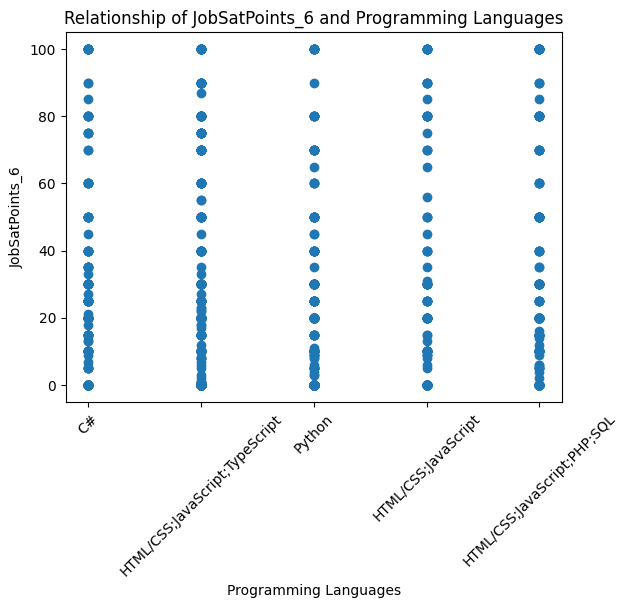

In [84]:
top_languages = df['LanguageHaveWorkedWith'].value_counts().head().index.tolist()
df_filtered = df[df['LanguageHaveWorkedWith'].isin(top_languages)]

plt.scatter(df_filtered['LanguageHaveWorkedWith'], df_filtered['JobSatPoints_6'])
plt.title('Relationship of JobSatPoints_6 and Programming Languages')
plt.xlabel('Programming Languages')
plt.ylabel('JobSatPoints_6')
plt.xticks(rotation=45)
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


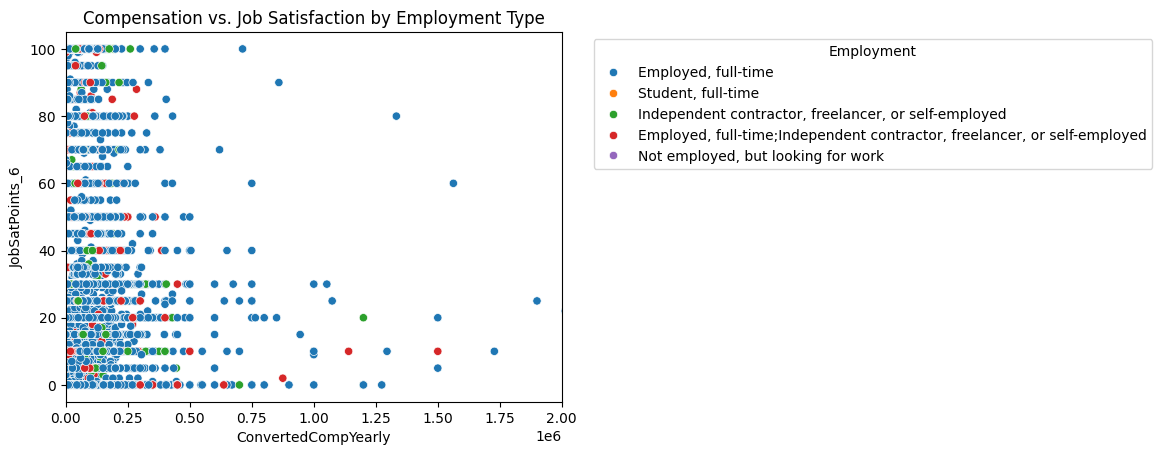

In [98]:
top_emp = df['Employment'].value_counts().head(5).index.tolist()
df_filtered = df[df['Employment'].isin(top_emp)]

sn.scatterplot(data=df_filtered, x='ConvertedCompYearly', y='JobSatPoints_6', hue='Employment')
plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('JobSatPoints_6')
plt.legend(title='Employment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 2000000)
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


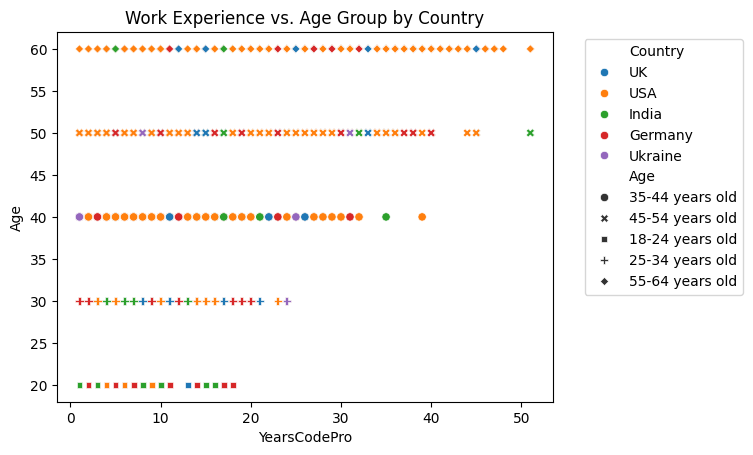

In [103]:
top_countries = df['Country'].value_counts().head().index.tolist()
top_age = df['Age'].value_counts().head().index.tolist()

df_filtered = df[df['Country'].isin(top_countries)]
df_filtered = df_filtered[df_filtered['Age'].isin(top_age)]

sn.scatterplot(data=df_filtered, x='YearsCodePro', y='Age_Median', hue='Country', style='Age')
plt.title('Work Experience vs. Age Group by Country')
plt.xlabel('YearsCodePro')
plt.ylabel('Age')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
